In [12]:
import pandas as pd

df = pd.read_csv("UpdatedResumeDataSet 2.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
#Install Required Libraries

!pip install pandas numpy scikit-learn nltk streamlit plotly


In [7]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Dataset
df = pd.read_csv("UpdatedResumeDataSet 2.csv")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# -------------------------------
# Text Cleaning Function
# -------------------------------
def clean_text(text):
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return " ".join(words)

df["Cleaned_Resume"] = df["Resume"].apply(clean_text)

In [10]:
# -------------------------------
# Job Description Input
# -------------------------------
job_description = """
Looking for a Python Developer with experience in Machine Learning,
Data Analysis, SQL, Pandas, NumPy, Scikit-learn and NLP.
"""

job_description = clean_text(job_description)

In [11]:
# -------------------------------
# TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer()
resume_vectors = vectorizer.fit_transform(df["Cleaned_Resume"])
job_vector = vectorizer.transform([job_description])

In [13]:
# -------------------------------
# Similarity Scoring
# -------------------------------
df["Match_Score"] = cosine_similarity(resume_vectors, job_vector)

In [14]:
# Normalize score
df["Match_Score"] = df["Match_Score"] * 100

In [15]:
# -------------------------------
# Rank Candidates
# -------------------------------
ranked_candidates = df.sort_values(by="Match_Score", ascending=False)

In [16]:
# -------------------------------
# Top Candidates
# -------------------------------
top_candidates = ranked_candidates.head(10)

print("Top 10 Candidates for the Job:\n")
print(top_candidates[["Category", "Match_Score"]])

Top 10 Candidates for the Job:

        Category  Match_Score
38  Data Science    33.100124
28  Data Science    33.100124
18  Data Science    33.100124
8   Data Science    33.100124
27  Data Science    30.871230
17  Data Science    30.871230
7   Data Science    30.871230
37  Data Science    30.871230
16  Data Science    17.349206
6   Data Science    17.349206


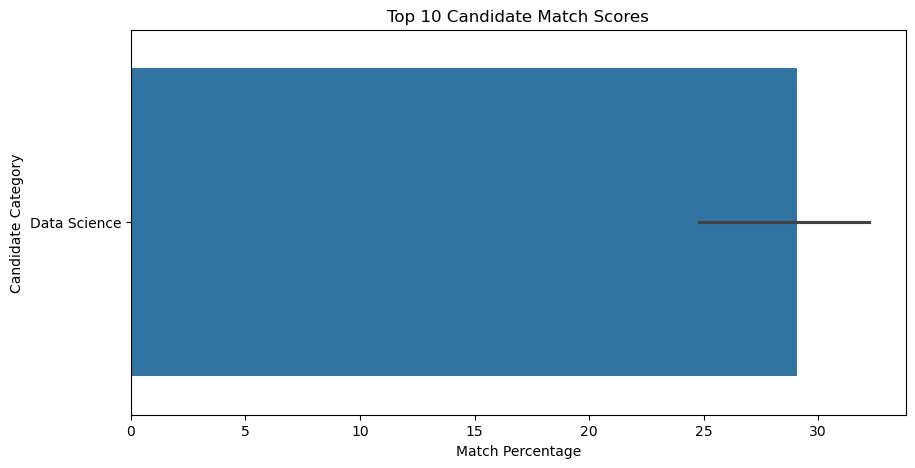

In [17]:
# -------------------------------
# Visualization for Recruiters
# -------------------------------
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_candidates["Match_Score"],
    y=top_candidates["Category"]
)
plt.title("Top 10 Candidate Match Scores")
plt.xlabel("Match Percentage")
plt.ylabel("Candidate Category")
plt.show()

In [23]:
Python Code – ATS Optimized

import pandas as pd
import numpy as np
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
from nltk.corpus import stopwords

# ---------------------------
# Load Dataset
# ---------------------------
df = pd.read_csv("UpdatedResumeDataSet 2.csv")

SyntaxError: invalid character '–' (U+2013) (3374177723.py, line 1)

In [24]:
# ---------------------------
# Clean Text
# ---------------------------

def clean_text(text):
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return " ".join(words)

df["clean_resume"] = df["Resume"].apply(clean_text)

In [25]:
# ---------------------------
# Job Description
# ---------------------------
job_description = """
Python Developer with experience in Machine Learning, Data Analysis,
SQL, Pandas, NumPy, NLP, Scikit-learn, and REST APIs.
"""
job_description = clean_text(job_description)


In [26]:
# ---------------------------
# Skill Dictionary (ATS Core)
# ---------------------------
skills = [
    "python", "machine learning", "data analysis", "sql",
    "pandas", "numpy", "nlp", "scikit learn", "deep learning",
    "rest api", "tensorflow"
]

In [27]:
# ---------------------------
# Skill Match Score
# ---------------------------
def skill_score(resume, skills):
    score = 0
    for skill in skills:
        if skill in resume:
            score += 1
    return (score / len(skills)) * 100

df["skill_score"] = df["clean_resume"].apply(lambda x: skill_score(x, skills))


In [28]:
# ---------------------------
# Keyword Match (TF-IDF)
# ---------------------------
vectorizer = TfidfVectorizer()
resume_vectors = vectorizer.fit_transform(df["clean_resume"])
job_vector = vectorizer.transform([job_description])

df["keyword_score"] = cosine_similarity(resume_vectors, job_vector) * 100

In [29]:
# ---------------------------
# Experience Detection
# ---------------------------
def experience_score(text):
    years = re.findall(r'(\d+)\s+years', text)
    if years:
        yrs = max([int(y) for y in years])
        return min(yrs * 10, 100)
    return 30  # default fresher score

df["experience_score"] = df["Resume"].apply(experience_score)

In [30]:
# ---------------------------
# Resume Quality Score
# ---------------------------
def quality_score(text):
    word_count = len(text.split())
    if word_count > 800:
        return 100
    elif word_count > 500:
        return 80
    elif word_count > 300:
        return 60
    else:
        return 40

df["quality_score"] = df["clean_resume"].apply(quality_score)

In [31]:
# ---------------------------
# Final ATS Score (Weighted)
# ---------------------------
df["ATS_Score"] = (
    df["keyword_score"] * 0.40 +
    df["skill_score"] * 0.35 +
    df["experience_score"] * 0.15 +
    df["quality_score"] * 0.10
)

In [32]:
# ---------------------------
# Rank Candidates
# ---------------------------
ranked = df.sort_values("ATS_Score", ascending=False)

print("\nTop 10 ATS-Optimized Candidates\n")
print(ranked[["Category", "ATS_Score"]].head(10))


Top 10 ATS-Optimized Candidates

        Category  ATS_Score
17  Data Science  51.393970
37  Data Science  51.393970
27  Data Science  51.393970
7   Data Science  51.393970
38  Data Science  47.828193
28  Data Science  47.828193
8   Data Science  47.828193
18  Data Science  47.828193
30  Data Science  41.763880
20  Data Science  41.763880


In [33]:
#Python Code – Explainable AI Layer

# -----------------------------------
# Explainable AI: Rejection Reasoning
# -----------------------------------

def explain_rejection(row):
    reasons = []

    if row["skill_score"] < 50:
        reasons.append("Missing or insufficient required technical skills")

    if row["keyword_score"] < 40:
        reasons.append("Low keyword relevance to the job description")

    if row["experience_score"] < 50:
        reasons.append("Insufficient professional experience for this role")

    if row["quality_score"] < 60:
        reasons.append("Resume structure or length below ATS standards")

    if not reasons:
        return "Strong candidate – resume meets ATS requirements"

    return "; ".join(reasons)

df["ATS_Explanation"] = df.apply(explain_rejection, axis=1)


In [35]:
#Recruiter View (Explainable Output)

rejected = df[df["ATS_Score"] < 70]

print("\nSample Rejection Explanations:\n")
print(rejected[[
    "Category",
    "ATS_Score",
    "ATS_Explanation"
]].head(5))


Sample Rejection Explanations:

       Category  ATS_Score                                    ATS_Explanation
0  Data Science  41.763880  Low keyword relevance to the job description; ...
1  Data Science  17.697714  Missing or insufficient required technical ski...
2  Data Science  29.105742  Missing or insufficient required technical ski...
3  Data Science  32.935333  Missing or insufficient required technical ski...
4  Data Science  17.481327  Missing or insufficient required technical ski...


In [36]:
#Resume Feedback (Bonus – Candidate View)

def candidate_feedback(row):
    tips = []

    if row["skill_score"] < 50:
        tips.append("Add more role-specific technical skills")

    if row["keyword_score"] < 40:
        tips.append("Align resume keywords with job description")

    if row["experience_score"] < 50:
        tips.append("Highlight projects or internships")

    if row["quality_score"] < 60:
        tips.append("Improve resume length and structure")

    if not tips:
        return "Your resume is well-optimized for ATS systems"

    return " | ".join(tips)

df["Candidate_Feedback"] = df.apply(candidate_feedback, axis=1)